In [ ]:
################## Importing Relevant Packages ###########################

import numpy as np

import matplotlib.pyplot as plt
from scipy import optimize

In [ ]:
################## Basic code for blackjack game, same as in the .py file ###########################

import random

def shuffle():
    return [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]

def pick_card(card_list):
    if len(card_list) == 0:
        return pick_card(shuffle())
    choice = random.choice(card_list)
    card_list.remove(choice)
    return choice

def pick_bet():
    bet_options = [10, 20, 30, 40, 50]
    bet_choice = random.choice(bet_options)
    return bet_choice

def pick_bet_with_card_counting(running_count):
    bet_options = [10, 20, 30, 40, 50]
    weights = []
    if running_count >= 3:
        weights = [0, 0, 0.2, 0.3, 0.5]
    elif running_count < 3:
        weights = [0.5, 0.3, 0.2, 0, 0]
    return random.choices(bet_options, weights)[0]

def determine_win(dealer_score, player_score):
    if dealer_score == player_score:
        return 0
    elif dealer_score == 21:
        return 1
    elif player_score == 21:
        return 2
    elif player_score > 21:
        return 1
    elif dealer_score > 21:
        return 2
    elif dealer_score > player_score:
        return 1
    elif player_score > dealer_score:
        return 2

def player_should_continue(player_score):
    if player_score == 21:
        return False
    elif player_score < 17:
        return True
    elif player_score > 21:
        return False

def dealer_should_continue(dealer_score):
    if dealer_score == 21:
        return False
    if dealer_score < 17:
        return True
    elif dealer_score > 21:
        return False

def player_should_continue_advanced(player_score, dealer_card):
    if player_score == 21:
        return False
    elif player_score > 21:
        return False
    elif(17 <= player_score <=21):
        return False
    elif(13 <= player_score <= 16 and 2 <= dealer_card <= 6):
        return False
    elif(13 <= player_score <= 16 and 7 <= dealer_card <= 13):
        return True
    elif(12 == player_score and 4 <= dealer_card <= 6):
        return False
    elif(12 == player_score and (2<= dealer_card <= 3 or 7<= dealer_card <= 13)):
        return True
    else:
        return True


dealer_total_wins = 0
player_total_wins = 0
player_balance = 0

dealer_final_hands = []
player_final_hands = []

def play_game(deck):
    dealer_cards = [pick_card(deck), pick_card(deck)]
    player_cards = [pick_card(deck), pick_card(deck)]
    player_bet = pick_bet()
    player_turn = True
    dealer_turn = False

    while player_turn or dealer_turn:
        dealer_score = sum(dealer_cards)
        player_score = sum(player_cards)

        if dealer_turn:
            if dealer_should_continue(dealer_score):
                dealer_cards.append(pick_card(deck))
            else:
                dealer_turn = False

        if player_turn:
            if player_should_continue(player_score):
                player_cards.append(pick_card(deck))
            else:
                player_turn = False
                dealer_turn = True

    dealer_score = sum(dealer_cards)
    player_score = sum(player_cards)

    result = determine_win(dealer_score, player_score)

    dealer_win = False
    player_win = False

    global player_balance
    player_balance = 0

    if result == 1:
        dealer_win = True
        global dealer_total_wins
        dealer_total_wins += 1
        player_balance -= player_bet
    elif result == 2:
        player_win = True
        global player_total_wins
        player_total_wins += 1
        player_balance += player_bet

    dealer_final_hands.append((dealer_cards, dealer_score, dealer_win))
    player_final_hands.append((player_cards, player_score, player_win))


#source: wikipedia blackjack page
def play_game_with_strategy(deck):
    dealer_cards = [pick_card(deck), pick_card(deck)]
    player_cards = [pick_card(deck), pick_card(deck)]
    player_bet = pick_bet()

    player_turn = True
    dealer_turn = False

    while player_turn or dealer_turn:
        dealer_score = sum(dealer_cards)
        player_score = sum(player_cards)

        if dealer_turn:
            if dealer_should_continue(dealer_score):
                dealer_cards.append(pick_card(deck))
            else:
                dealer_turn = False

        if player_turn:
            if player_should_continue_advanced(player_score, dealer_cards[0]):
                player_cards.append(pick_card(deck))
            else:
                player_turn = False
                dealer_turn = True

    dealer_score = sum(dealer_cards)
    player_score = sum(player_cards)

    result = determine_win(dealer_score, player_score)

    dealer_win = False
    player_win = False

    global player_balance
    player_balance = 0

    if result == 1:
        dealer_win = True
        global dealer_total_wins
        dealer_total_wins += 1
        player_balance -= player_bet
    elif result == 2:
        player_win = True
        global player_total_wins
        player_total_wins += 1
        player_balance += player_bet

    dealer_final_hands.append((dealer_cards, dealer_score, dealer_win))
    player_final_hands.append((player_cards, player_score, player_win))

#source for how card counting works: https://www.blackjackapprenticeship.com/how-to-count-cards/
def play_game_with_card_counting(deck, running_count):
    dealer_cards = [pick_card(deck), pick_card(deck)]
    player_cards = [pick_card(deck), pick_card(deck)]
    player_bet = pick_bet_with_card_counting(running_count)

    player_turn = True
    dealer_turn = False

    while player_turn or dealer_turn:
        dealer_score = sum(dealer_cards)
        player_score = sum(player_cards)

        if dealer_turn:
            if dealer_should_continue(dealer_score):
                dealer_cards.append(pick_card(deck))
            else:
                dealer_turn = False

        if player_turn:
            if player_should_continue_advanced(player_score, dealer_cards[0]):
                player_cards.append(pick_card(deck))
            else:
                player_turn = False
                dealer_turn = True

    dealer_score = sum(dealer_cards)
    player_score = sum(player_cards)

    result = determine_win(dealer_score, player_score)

    for dealer_card in dealer_cards:
        if dealer_card < 7:
            running_count += 1
        elif 10 <= dealer_card <= 11:
            running_count -= 1

    for player_card in player_cards:
        if player_card < 7:
            running_count += 1
        elif 10 <= player_card <= 11:
            running_count -= 1


    dealer_win = False
    player_win = False

    global player_balance
    player_balance = 0

    if result == 1:
        dealer_win = True
        global dealer_total_wins
        dealer_total_wins += 1
        player_balance -= player_bet
    elif result == 2:
        player_win = True
        global player_total_wins
        player_total_wins += 1
        player_balance += player_bet

    dealer_final_hands.append((dealer_cards, dealer_score, dealer_win))
    player_final_hands.append((player_cards, player_score, player_win))
    return running_count


def run_simulation(iterations):
    global dealer_total_wins, player_total_wins, player_balance, player_final_hands, dealer_final_hands
    dealer_total_wins = 0
    player_total_wins = 0
    player_balance = 0
    player_final_hands = []
    dealer_final_hands = []

    i = 0
    deck = shuffle()
    while i < iterations:
        play_game(deck)
        i += 1

def run_simulation_with_strategy(iterations):
    global dealer_total_wins, player_total_wins, player_balance, player_final_hands, dealer_final_hands
    dealer_total_wins = 0
    player_total_wins = 0
    player_balance = 0
    player_final_hands = []
    dealer_final_hands = []

    i = 0
    deck = shuffle()
    while i < iterations:
        play_game_with_strategy(deck)
        i += 1

def run_simulation_with_card_counting(iterations):
    global dealer_total_wins, player_total_wins, player_balance, player_final_hands, dealer_final_hands
    dealer_total_wins = 0
    player_total_wins = 0
    player_balance = 0
    player_final_hands = []
    dealer_final_hands = []
    running_count = 0

    i = 0
    deck = shuffle()
    while i < iterations:
        running_count = play_game_with_card_counting(deck, running_count)
        i += 1

def print_basic_stats():
    return (round(player_total_wins/(dealer_total_wins+player_total_wins), 2), player_balance)

def print_first_card_stats():
    first_card_stats_basic = []
    for i in range(2, 12):
        totals = []
        total = 0
        total_wins = 0

        for hand in player_final_hands:
            if hand[0][0] == i:
                totals.append(hand)
                total += 1
                if hand[2] == True:
                    total_wins += 1

        first_card_stats_basic.append(total_wins/total)
        print(f"Chance of player win if player's first card is {i}: ", total_wins/total)

    print()

def print_second_card_stats():
    second_card_stats_basic = []
    for i in range(2, 12):
        totals = []
        total = 0
        total_wins = 0

        for hand in player_final_hands:
            if hand[0][1] == i:
                totals.append(hand)
                total += 1
                if hand[2] == True:
                    total_wins += 1

        second_card_stats_basic.append(total_wins/total)
        print(f"Chance of player win if player's second card is {i}: ", total_wins/total)

def print_chance_of_bust():
    total_bust = 0
    total_hands = 0
    for hand in player_final_hands:
        if hand[1] > 21:
            total_bust += 1
        total_hands += 1

    print(f"\nChance of player bust: ", total_bust/total_hands)


In [ ]:
# plots the chances of winning if your card is a ___..., depending on first/second card and basic/advanced strategy
def plot_card_stats(card_position, strategy_type):
    card_stats = []
    card_numbers = list(range(2, 12))

    for i in card_numbers:
        totals = []
        total = 0
        total_wins = 0

        for hand in player_final_hands:
            if hand[0][card_position] == i:
                totals.append(hand)
                total += 1
                if hand[2]:
                    total_wins += 1

        if total == 0:
            card_stats.append(0)
        else:
            card_stats.append(total_wins / total)

    plt.scatter(card_numbers, card_stats)
    plt.title(f"Chance of player win based on the {'first' if card_position == 0 else 'second'} card ({strategy_type} Strategy)")
    plt.xlabel(f"Player's {'first' if card_position == 0 else 'second'} card")
    plt.ylabel("Percent chance of winning")
    plt.show()

# function to display a bar chart of the player's final balances
def plot_final_balance_bar_chart(final_balances, strategy_name):
    colors = ['green' if balance >= 0 else 'red' for balance in final_balances]

    plt.bar(range(1, len(final_balances) + 1), final_balances, color=colors)
    plt.xlabel('Simulation Number')
    plt.ylabel('Final Balance')
    plt.title(f'{strategy_name} Final Balance in {len(final_balances)} Simulations')
    plt.show()

# function to display the bar charts of winning chances
def plot_win_stats_bar_chart(win_stats, strategy_name):
    plt.bar(range(1, len(win_stats) + 1), win_stats)
    plt.xlabel('Simulation Number')
    plt.ylabel('Win Stats')
    plt.title(f'{strategy_name} Win Stats in {len(win_stats)} Simulations')
    plt.show()

In [ ]:
################## Basic Strategy Statistics ###########################
print()
print("----------------------Playing game with basic strategy----------------------")
print()


run_simulation(1000)
print("Overall chance of player winning: ", print_basic_stats()[0])
print("Final player bankroll: ", print_basic_stats()[1])
print_chance_of_bust()
print()


----------------------Playing game with basic strategy----------------------

Overall chance of player winning:  0.46
Final player bankroll:  -10

Chance of player bust:  0.318




----------------------Chance of player win depending on first card dealt (Basic Strategy)----------------------

Chance of player win if player's first card is 2:  0.36904761904761907
Chance of player win if player's first card is 3:  0.3333333333333333
Chance of player win if player's first card is 4:  0.36
Chance of player win if player's first card is 5:  0.25
Chance of player win if player's first card is 6:  0.40625
Chance of player win if player's first card is 7:  0.3125
Chance of player win if player's first card is 8:  0.35
Chance of player win if player's first card is 9:  0.4647887323943662
Chance of player win if player's first card is 10:  0.4965753424657534
Chance of player win if player's first card is 11:  0.5764705882352941




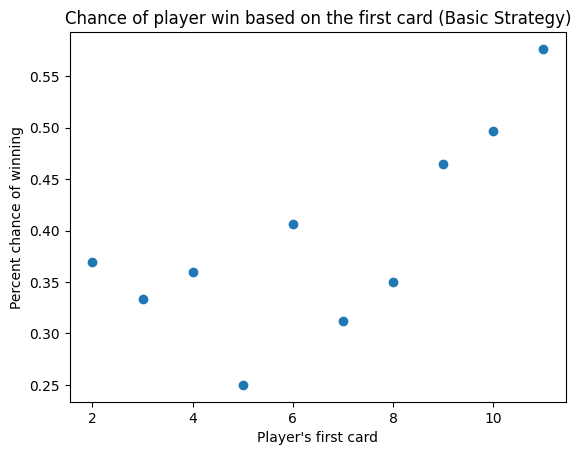

In [ ]:
################## Chance of win given player's first card (Basic Strategy) ###########################
print()
print("----------------------Chance of player win depending on first card dealt (Basic Strategy)----------------------")
print()

run_simulation(1000)
print_first_card_stats()
print()
plot_card_stats(0, "Basic")


----------------------Chance of player win depending on second card dealt (Basic Strategy)----------------------

Chance of player win if player's second card is 2:  0.31343283582089554
Chance of player win if player's second card is 3:  0.2948717948717949
Chance of player win if player's second card is 4:  0.40229885057471265
Chance of player win if player's second card is 5:  0.2727272727272727
Chance of player win if player's second card is 6:  0.3246753246753247
Chance of player win if player's second card is 7:  0.3258426966292135
Chance of player win if player's second card is 8:  0.40789473684210525
Chance of player win if player's second card is 9:  0.4430379746835443
Chance of player win if player's second card is 10:  0.5033333333333333
Chance of player win if player's second card is 11:  0.5



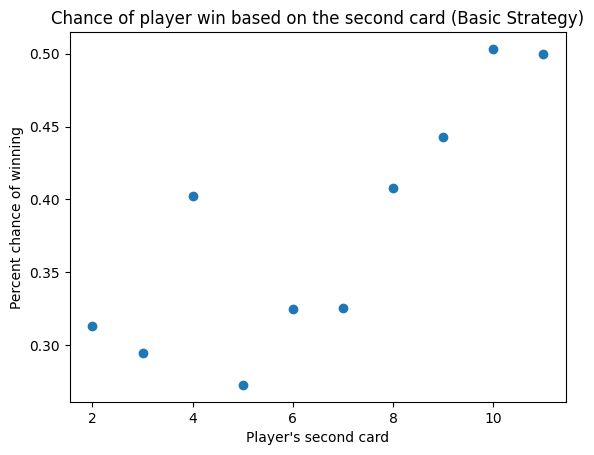

In [ ]:
################## Chance of win given player's second card (Basic Strategy) ###########################
print()
print("----------------------Chance of player win depending on second card dealt (Basic Strategy)----------------------")
print()

print_second_card_stats()
print()
plot_card_stats(1, "Basic")

In [ ]:
################## Advanced Strategy Statistics ###########################
print()
print("----------------------Playing game with advanced strategy----------------------")
print()

run_simulation_with_strategy(1000)
print("Overall chance of player winning: ", print_basic_stats()[0])
print("Final player bankroll: ", print_basic_stats()[1])
print_chance_of_bust()
print()


----------------------Playing game with advanced strategy----------------------

Overall chance of player winning:  0.5
Final player bankroll:  50

Chance of player bust:  0.192




----------------------Chance of player win depending on first card dealt (Advanced Strategy)----------------------

Chance of player win if player's first card is 2:  0.358974358974359
Chance of player win if player's first card is 3:  0.3614457831325301
Chance of player win if player's first card is 4:  0.358974358974359
Chance of player win if player's first card is 5:  0.34831460674157305
Chance of player win if player's first card is 6:  0.35714285714285715
Chance of player win if player's first card is 7:  0.3380281690140845
Chance of player win if player's first card is 8:  0.5375
Chance of player win if player's first card is 9:  0.4107142857142857
Chance of player win if player's first card is 10:  0.501577287066246
Chance of player win if player's first card is 11:  0.5384615384615384




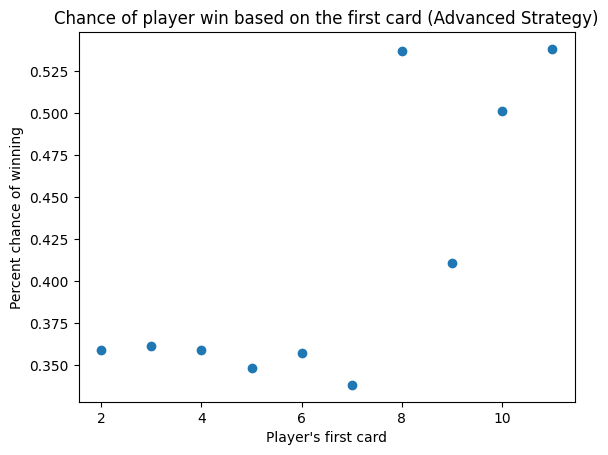

In [ ]:
################## Chance of win given player's first card (Advanced Strategy) ###########################
print()
print("----------------------Chance of player win depending on first card dealt (Advanced Strategy)----------------------")
print()

run_simulation_with_strategy(1000)
print_first_card_stats()
print()
plot_card_stats(0, "Advanced")


----------------------Chance of player win depending on second card dealt (Advanced Strategy)----------------------

Chance of player win if player's second card is 2:  0.31343283582089554
Chance of player win if player's second card is 3:  0.2948717948717949
Chance of player win if player's second card is 4:  0.40229885057471265
Chance of player win if player's second card is 5:  0.2727272727272727
Chance of player win if player's second card is 6:  0.3246753246753247
Chance of player win if player's second card is 7:  0.3258426966292135
Chance of player win if player's second card is 8:  0.40789473684210525
Chance of player win if player's second card is 9:  0.4430379746835443
Chance of player win if player's second card is 10:  0.5033333333333333
Chance of player win if player's second card is 11:  0.5



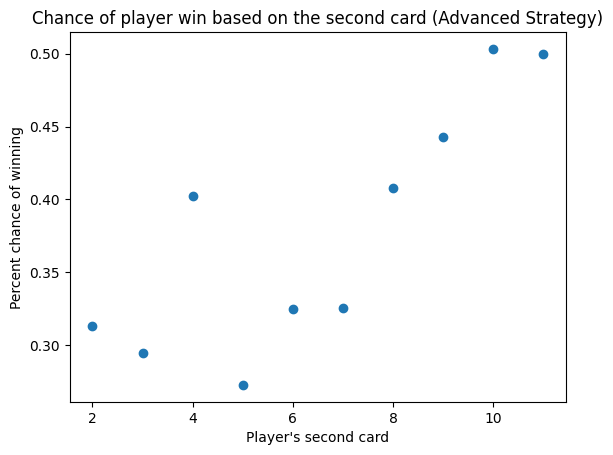

In [ ]:
################## Chance of win given player's second card (Advanced Strategy) ###########################
print()
print("----------------------Chance of player win depending on second card dealt (Advanced Strategy)----------------------")
print()

print_second_card_stats()
print()
plot_card_stats(1, "Advanced")

In [ ]:
################## Card counting strategy basic statistics ###########################
print()
print("----------------------Card Counting Strategy Statistics----------------------")
print()


run_simulation_with_card_counting(1000)
print("Chance of winning with card count: ", print_basic_stats()[0])
print("Final bankroll after playing with card counting strategy: ", print_basic_stats()[1])
print_chance_of_bust()


----------------------Card Counting Strategy Statistics----------------------

Chance of winning with card count:  0.49
Final bankroll after playing with card counting strategy:  40

Chance of player bust:  0.198


In [ ]:
################## Running Basic Strategy 10 sets of 1,000 times ###########################

#clears the lists holding final win stats and final balance stats
basic_strategy_win_stats = []
basic_strategy_final_balance = []

#runs simulation 10 sets of 1,000 times
i = 0
while i < 10:
    run_simulation(1000)
    basic_strategy_win_stats.append(print_basic_stats()[0])
    basic_strategy_final_balance.append(print_basic_stats()[1])
    i+=1


----------------------Running Basic strategy 10 times----------------------

Balance stats for basic strategy: 
-40 -30 40 -30 -40 30 -10 40 -40 0 
Average final balance for basic strategy: -8.0



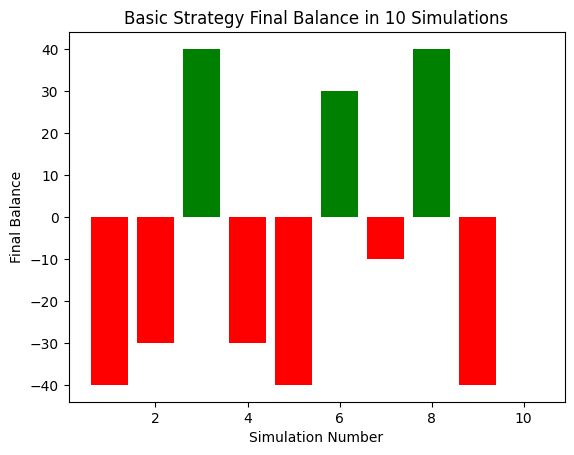

In [ ]:
print()
print("----------------------Running Basic strategy 10 times----------------------")
print()

#prints the 10 final balance values
balance_total = 0
print("Balance stats for basic strategy: ")
for balance in basic_strategy_final_balance:
    print(f"{balance} ", end = '')
    balance_total+= balance

#shows the average final balance
print()
print(f"Average final balance for basic strategy: {round(balance_total/len(basic_strategy_final_balance), 2)}")
print()


#plots the final bar chart for the final balance values
plot_final_balance_bar_chart(basic_strategy_final_balance, 'Basic Strategy')
print()


----------------------Winning statistics for basic strategy----------------------

Win stats for basic strategy:
0.45 0.43 0.46 0.46 0.43 0.48 0.45 0.46 0.44 0.41 
Average chance of winning with basic strategy: 0.45



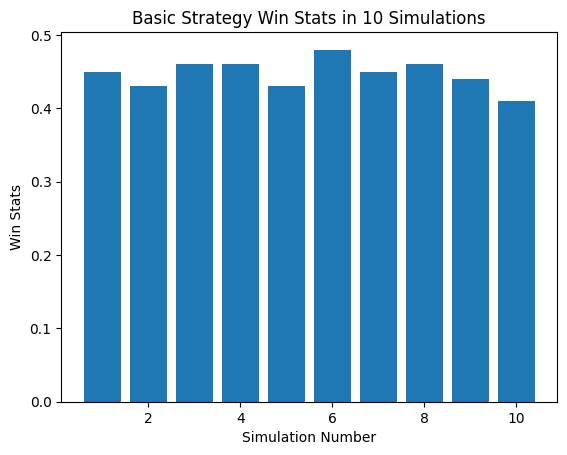

In [ ]:
print()
print("----------------------Winning statistics for basic strategy----------------------")
print()

#prints the 10 average chances of winning
win_totals = 0
print("Win stats for basic strategy:")
for win_stat in basic_strategy_win_stats:
    print(f"{win_stat} ", end = '')
    win_totals += win_stat

#prints the overall average chance of winning
print()
print(f"Average chance of winning with basic strategy: {round(win_totals/len(basic_strategy_win_stats), 2)}")
print()

#plots the bar chart for the win stats
plot_win_stats_bar_chart(basic_strategy_win_stats, 'Basic Strategy')
print()

In [ ]:
################## Running Basic Strategy 10 sets of 1,000 times ###########################

#clears the lists for the win stats and final balances
advanced_strategy_win_stats = []
advanced_strategy_final_balance = []

#runs the simulation 10 sets of 1,000 times
i = 0
while i < 10:
    run_simulation_with_strategy(1000)
    advanced_strategy_win_stats.append(print_basic_stats()[0])
    advanced_strategy_final_balance.append(print_basic_stats()[1])
    i+=1


----------------------Running advanced strategy 10 times--------------------

Balance stats for advanced strategy: 
-30 30 0 30 40 0 30 -20 40 50 
Average final balance for advanced strategy: 17.0



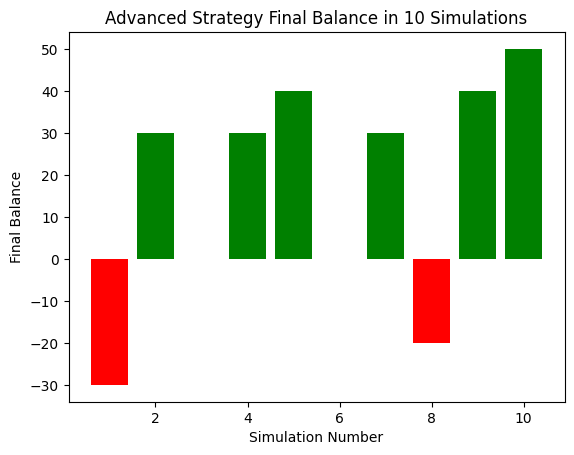

In [ ]:
print()
print("----------------------Running advanced strategy 10 times--------------------")
print()

#prints the 10 final balance values
balance_total = 0
print("Balance stats for advanced strategy: ")
for balance in advanced_strategy_final_balance:
    print(f"{balance} ", end = '')
    balance_total += balance

#prints the average final balance
print()
print(f"Average final balance for advanced strategy: {round(balance_total/len(advanced_strategy_final_balance), 2)}")
print()

#plots the bar chart of the final balances
plot_final_balance_bar_chart(advanced_strategy_final_balance, 'Advanced Strategy')
print()


----------------------Winning statistics for advanced strategy--------------------

Win stats for advanced strategy: 
0.5 0.49 0.45 0.49 0.5 0.45 0.46 0.47 0.48 0.5 
Average chance of winning with advanced strategy: 0.48



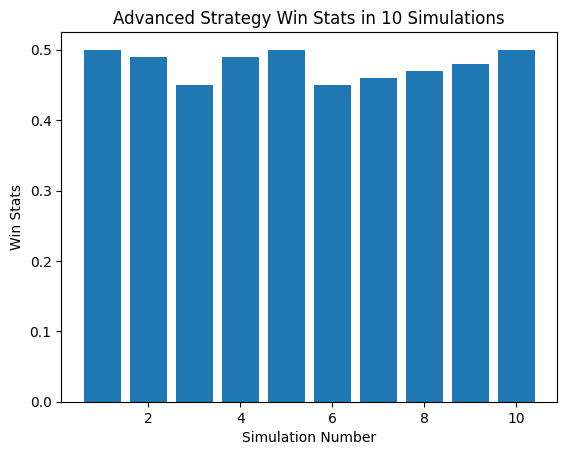

In [ ]:
print()
print("----------------------Winning statistics for advanced strategy--------------------")
print()

#prints the 10 average chances of winning
win_totals = 0
print("Win stats for advanced strategy: ")
for win_stat in advanced_strategy_win_stats:
    print(f"{win_stat} ", end = '')
    win_totals+= win_stat

#prints the overall average chance of winning
print()
print(f"Average chance of winning with advanced strategy: {round(win_totals/len(advanced_strategy_win_stats), 2)}")
print()

#plots the bar chart of the win stats
plot_win_stats_bar_chart(advanced_strategy_win_stats, 'Advanced Strategy')
print()

In [ ]:
#################### Playing game with card counting strategy 10 sets of 1,000 times ############################

#resets the lists holding final win stats and final balances
card_counting_strategy_win_stats = []
card_counting_strategy_final_balance = []

#runs the simulation 10 sets of 1,000 times
i = 0
while i < 10:
    run_simulation_with_card_counting(1000)
    card_counting_strategy_win_stats.append(print_basic_stats()[0])
    card_counting_strategy_final_balance.append(print_basic_stats()[1])
    i+=1


----------------------Running card counting strategy 10 times--------------------

Balance stats for card counting strategy: 
50 20 40 50 40 -40 -40 10 30 50 
Average final balance for card counting strategy: 21.0



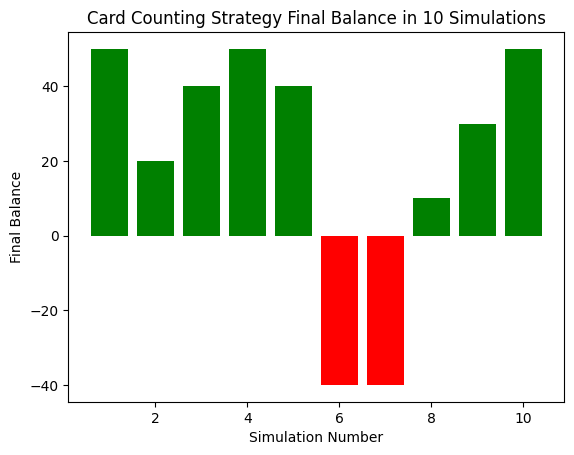

In [ ]:
print()
print("----------------------Running card counting strategy 10 times--------------------")
print()

#prints the 10 final balance values
balance_total = 0
print("Balance stats for card counting strategy: ")
for balance in card_counting_strategy_final_balance:
    print(f"{balance} ", end = '')
    balance_total += balance

#prints the average final balance
print()
print(f"Average final balance for card counting strategy: {round(balance_total/len(card_counting_strategy_final_balance), 2)}")
print()

#plots the bar chart of the final balance values
plot_final_balance_bar_chart(card_counting_strategy_final_balance, 'Card Counting Strategy')
print()


----------------------Winning statistics for card counting strategy--------------------

Win stats for card counting strategy: 
0.47 0.47 0.47 0.45 0.5 0.47 0.48 0.46 0.45 0.49 
Average chance of winning with card counting strategy: 0.47



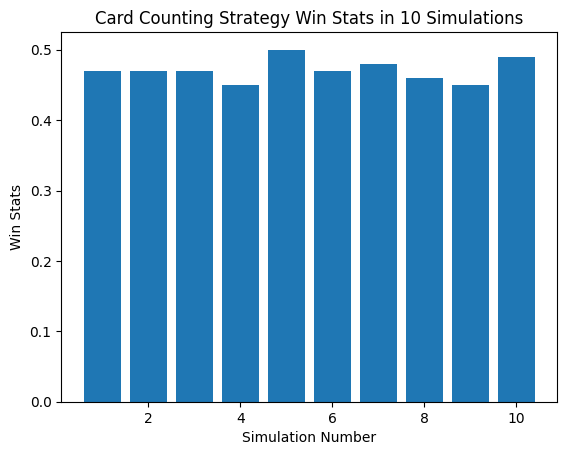

In [ ]:
print()
print("----------------------Winning statistics for card counting strategy--------------------")
print()

#prints the 10 average chances of winning
win_totals = 0
print("Win stats for card counting strategy: ")
for win_stat in card_counting_strategy_win_stats:
    print(f"{win_stat} ", end = '')
    win_totals+= win_stat

#prints the overall average chance of winning
print()
print(f"Average chance of winning with card counting strategy: {round(win_totals/len(advanced_strategy_win_stats), 2)}")
print()

#prints the bar chart of the win stats
plot_win_stats_bar_chart(card_counting_strategy_win_stats, 'Card Counting Strategy')
print()